In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime

In [2]:
df_p = pd.read_csv('./Data/Pedestrian_Counting_System_-_Monthly__counts_per_hour_.csv')

In [3]:
# seperating the dataframe into weekdays (Mon - Fri) and weekend (Sat, Sun)
constrain_wd = (df_p.Day == 'Monday') | (df_p.Day == 'Tuesday') | (df_p.Day == 'Wednesday') | (df_p.Day == 'Thursday') | (df_p.Day == 'Friday')
constrain_we = (df_p.Day == 'Saturday') | (df_p.Day == 'Sunday')
df_p_we = df_p.loc[constrain_we]
df_p_wd = df_p.loc[constrain_wd]

In [4]:
# creating the colorarray for weekday plots with highlights
color = []
for i in range(0, 24):
    if i == 8 or i == 12 or i == 13 or i == 17:
        color.append('c')
    else:
        color.append('green')

In [5]:
def creatingWDWEplots(df_wd, df_we, ylim, year=''):
    # Plot for weekdays / weekend containing time of the day
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
    df_wd.groupby(['Time']).mean()['Hourly_Counts'].plot \
        .bar(title= 'Pedestrians on the Street per Time of the Day, Weekdays' + year + '\n', 
             ax=ax[0], edgecolor='darkgreen', color = color)
    df_we.groupby(['Time']).mean()['Hourly_Counts'].plot \
        .bar(title= 'Pedestrians on the Street per Time of the Day, Weekend' + year + '\n', 
             ax=ax[1], edgecolor='darkgreen', color = 'green')

    # Styling
    ax[0].set_ylabel('Pedestrians (Hourly Count Mean)');
    ax[1].set_ylabel('Pedestrians (Hourly Count Mean)');
    ax[0].set_ylim(0, ylim)
    ax[1].set_ylim(0, ylim)
    ax[0].tick_params(axis='x', rotation=360)
    ax[1].tick_params(axis='x', rotation=360)

    plt.tight_layout() 
    plt.show()

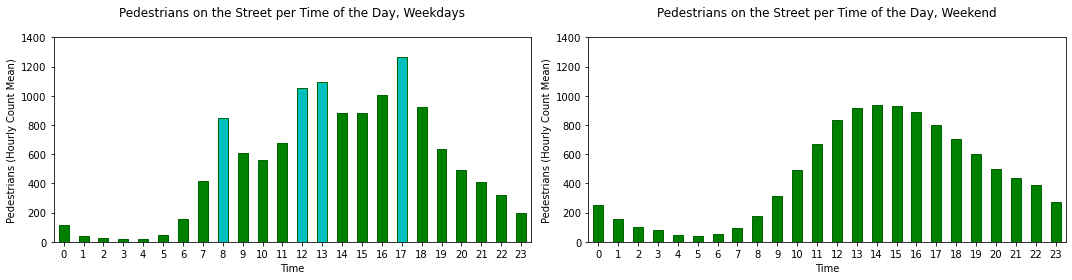

In [6]:
# Plot for weekdays / weekend containing time of the day over all years
creatingWDWEplots(df_p_wd, df_p_we, 1400)

Here is a split of the dataset in weekdays and weekends over all years. It shows their mean as we have a different amount of days in both datasets. The basic curve is similay as the curve shown on the weekends can be found during the weekdays as well. Durinf the week, there are 4 peaks in the data. One at 8 o'clock which is when people go to work. Two are at 12 and 13 o'clock which shows the lunch break. The last one is at 17 o'clock when most of the people leave work. Around the 'rush hour' when people go to work, there are more people around on the streets which can be seen by the bars around the peaks at 8 and 17 o'clock. On the weekends, there are more people up during the nigth walking around.

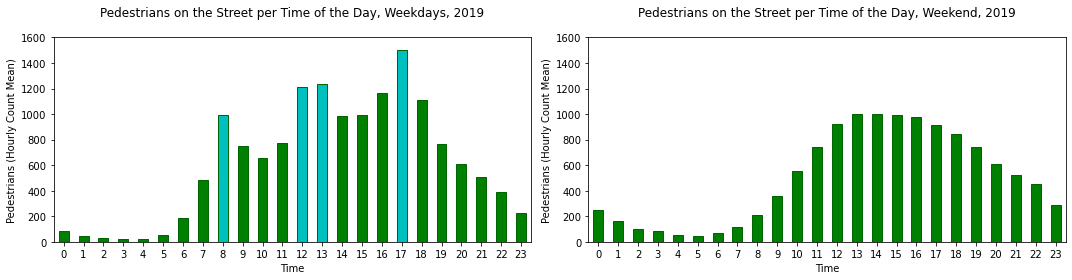

In [7]:
# getting data from precovid in 2019
df_p_we_19 = df_p_we.loc[df_p_we.Year == 2019]
df_p_wd_19 = df_p_wd.loc[df_p_wd.Year == 2019]

# Plot for weekdays / weekend containing time of the day over 2019
creatingWDWEplots(df_p_wd_19, df_p_we_19, 1600, ', 2019')

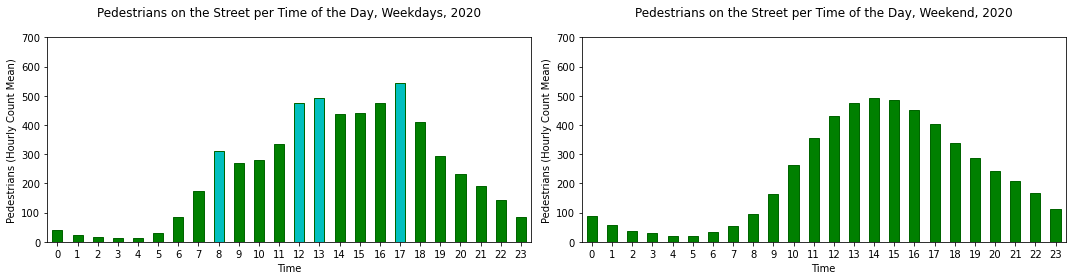

In [8]:
# getting data from during covid in 2020
df_p_we_20 = df_p_we.loc[df_p_we.Year == 2020]
df_p_wd_20 = df_p_wd.loc[df_p_wd.Year == 2020]

# Plot for weekdays / weekend containing time of the day over 2020
creatingWDWEplots(df_p_wd_20, df_p_we_20, 700, ', 2020')

Next up comes similar plots showing the difference between weeks precovid and during covid. As references we use 2019 (pre covid) and 2020 (during covid). The curve is similar on both plots. The difference is the mean of the data. In 2019 the peak on the weekend is at 1000 people while during covid it only reached 500 people. Similar is it during the week. 

In [9]:
# sort the dataset month column
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
df_p['Month'] = pd.Categorical(df_p['Month'], categories=months, ordered=True)

# creating data sets for 2019 and 2020
df_19 = df_p.loc[df_p.Year == 2019]
df_20 = df_p.loc[df_p.Year == 2020]

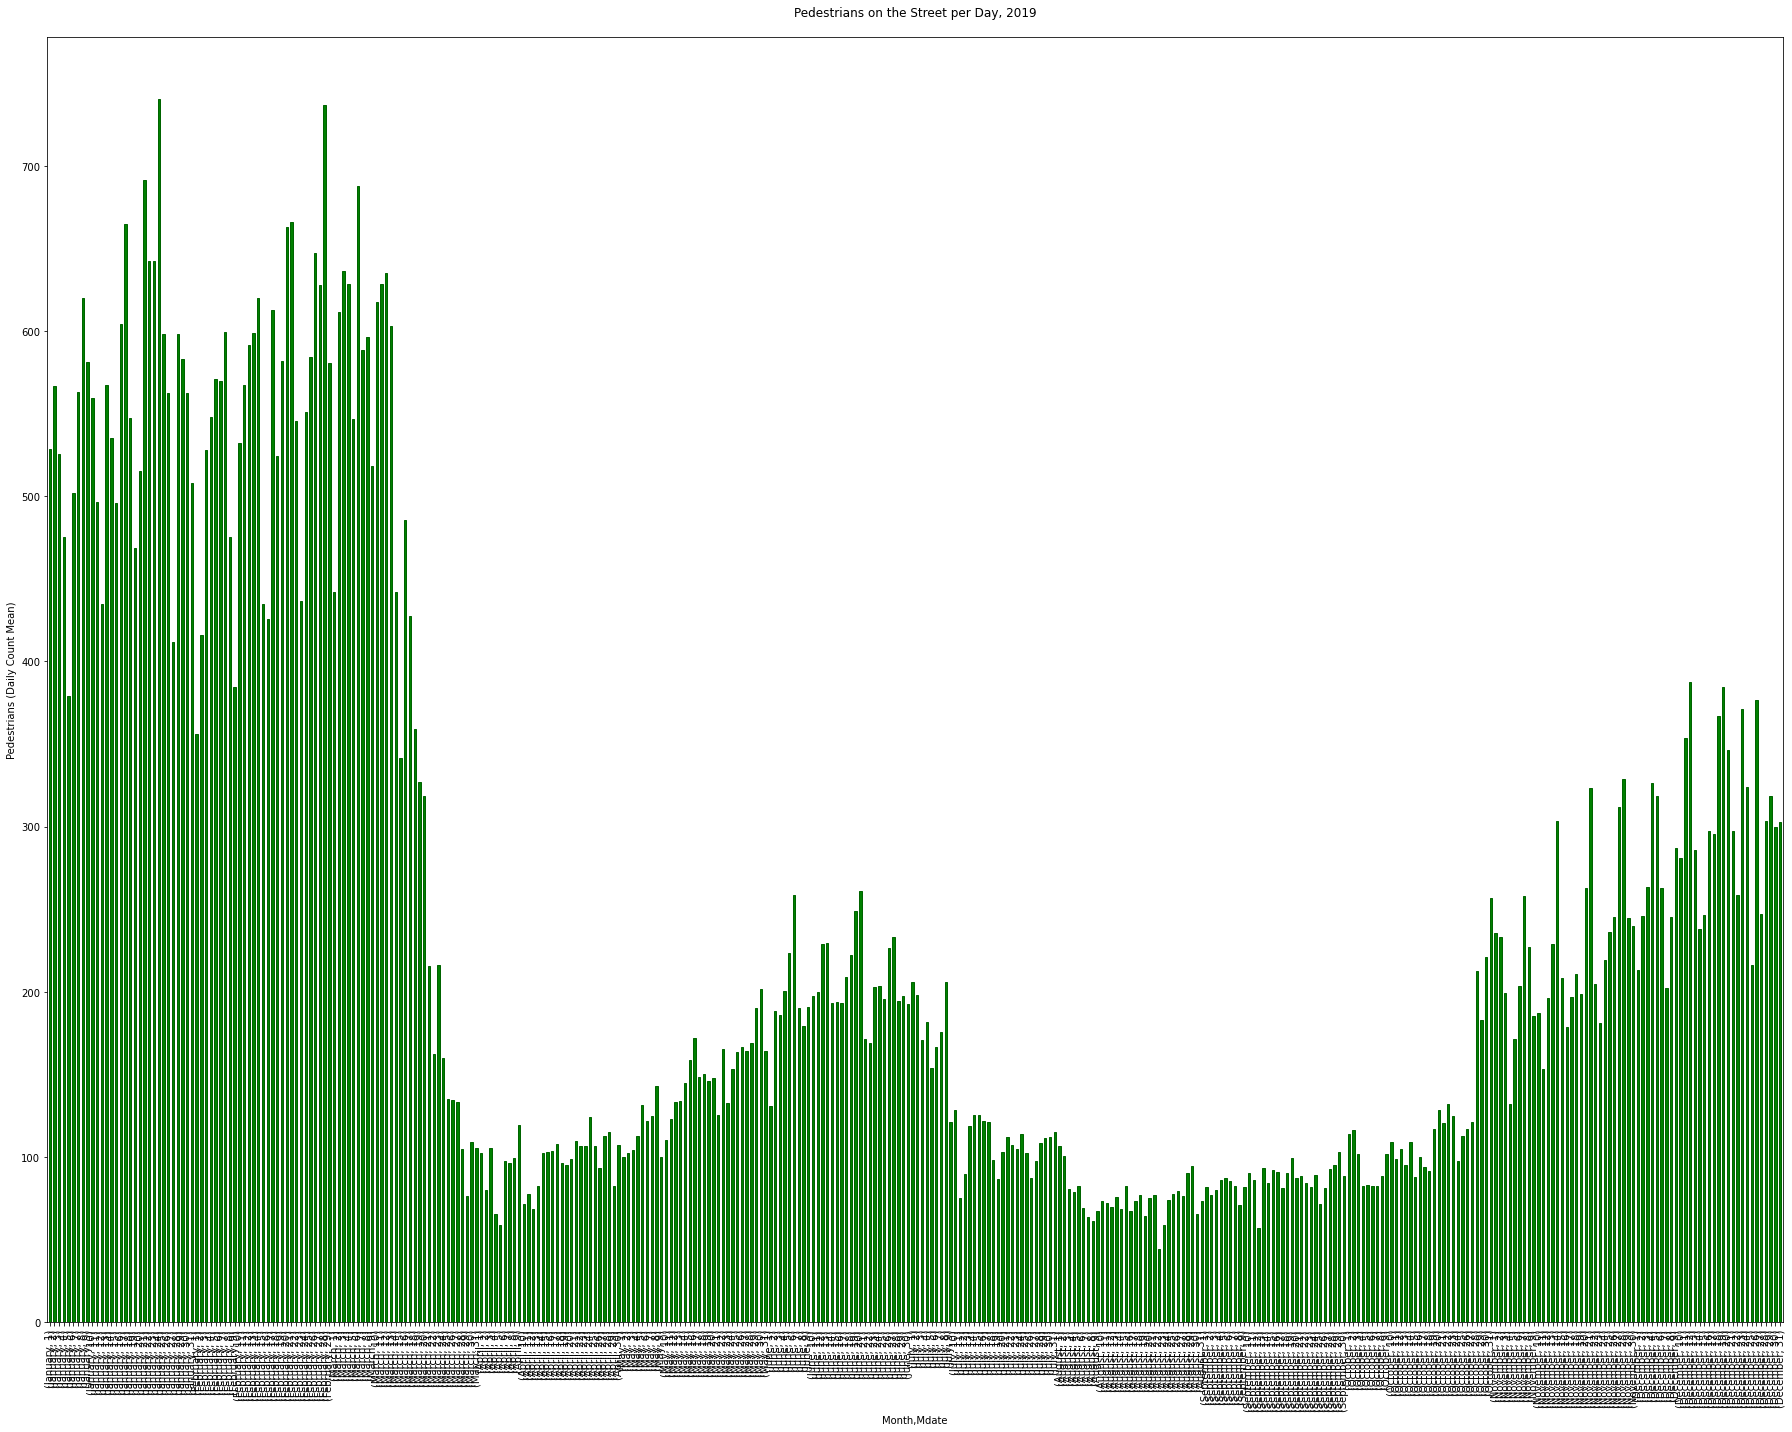

In [10]:
# create a fun plot showing pedestrians walking per day of the whole year 2019
fig = plt.figure(figsize=(25, 20))
df_20.groupby(['Month', 'Mdate']).mean()['Hourly_Counts'].dropna() \
    .plot.bar(title='Pedestrians on the Street per Day, 2019\n', edgecolor='darkgreen', color = 'green')

plt.ylabel('Pedestrians (Daily Count Mean)');

plt.tight_layout() 
plt.show()

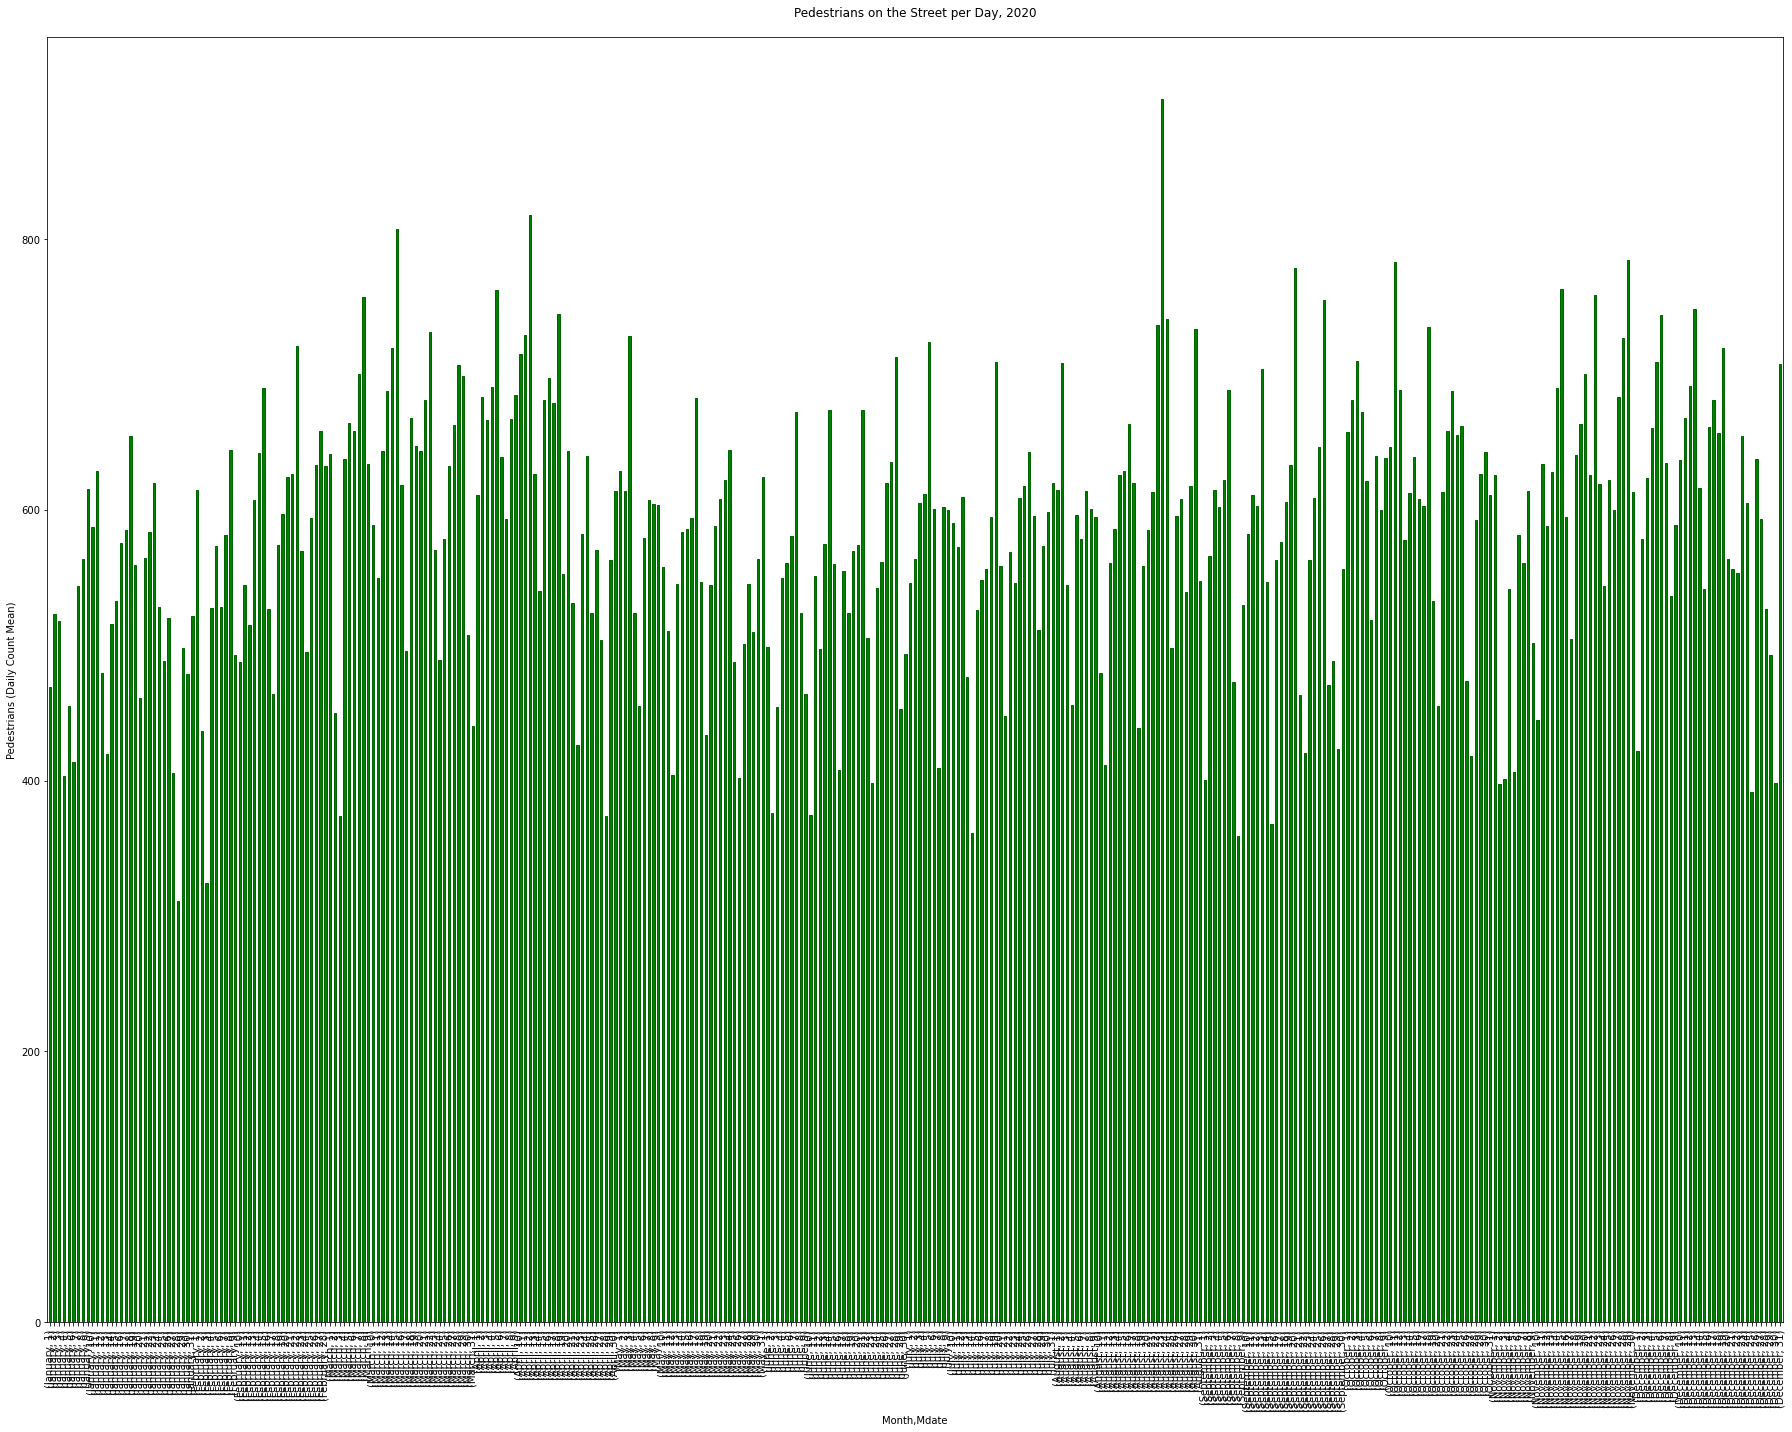

In [11]:
# create a fun plot showing pedestrians walking per day of the whole year 2020
fig = plt.figure(figsize=(25, 20))
df_19.groupby(['Month', 'Mdate']).mean()['Hourly_Counts'].dropna() \
    .plot.bar(title='Pedestrians on the Street per Day, 2020\n', edgecolor='darkgreen', color = 'green')

plt.ylabel('Pedestrians (Daily Count Mean)');

plt.tight_layout() 
plt.show()

The two plots aboth are just some fun plots. In the first one, you can see some drops over the year. The main focos with these plots is the comparrison of these two years, a precovid year 2019 and a year during covid in 2020. You may not be able to identify the specific dates but in 2020 you can see big drops in the graph which do not happen in 2019. These are actually the lockdown dates in Melbourne. There was a lockdown from 30. March until 12. May and another one from 8. July until 27. October. The time between the two lockdowns and afterwards shows that covid still had an impact on how many people were walking through the city. This is in interesting observation.

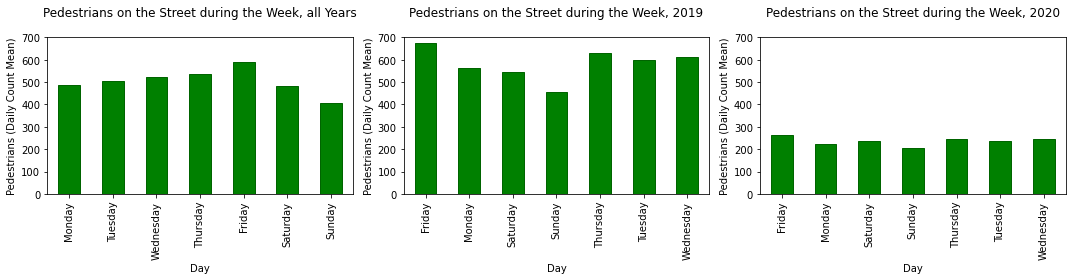

In [12]:
# Creating plots to visualize how many people are on the street throughout the week
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_p['Day'] = pd.Categorical(df_p['Day'], categories=days, ordered=True)
# Plot over all years / the whole dataset
df_p.groupby(['Day']).mean()['Hourly_Counts'].plot \
    .bar(title='Pedestrians on the Street during the Week, all Years\n', 
         ax=ax[0], edgecolor='darkgreen', color = 'green')
# Plot precovid in 2019
df_19.groupby(['Day']).mean()['Hourly_Counts'].plot \
    .bar(title='Pedestrians on the Street during the Week, 2019\n', 
         ax=ax[1], edgecolor='darkgreen', color = 'green')
# Plot during covid in 2020
df_20.groupby(['Day']).mean()['Hourly_Counts'].plot \
    .bar(title='Pedestrians on the Street during the Week, 2020\n', 
         ax=ax[2], edgecolor='darkgreen', color = 'green')

# Styling
ax[0].set_ylabel('Pedestrians (Daily Count Mean)')
ax[1].set_ylabel('Pedestrians (Daily Count Mean)')
ax[2].set_ylabel('Pedestrians (Daily Count Mean)')
ax[0].set_ylim(0, 700)
ax[1].set_ylim(0, 700)
ax[2].set_ylim(0, 700)

plt.tight_layout() 
plt.show()

In [13]:
df_s = pd.read_csv('./Data/Pedestrian_Counting_System_-_Sensor_Locations.csv')

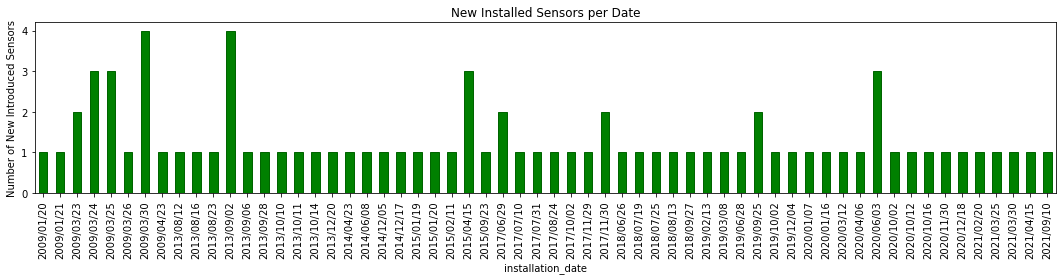

In [14]:
# Plot that shows new introduced sensors per date
fig = plt.figure(figsize=(15, 4))
df_s.groupby(['installation_date']).count()['sensor_id'].plot \
    .bar(title='New Installed Sensors per Date', 
         edgecolor='darkgreen', color = 'green')

# Styling
plt.ylabel('Number of New Introduced Sensors');

plt.tight_layout() 
plt.show()

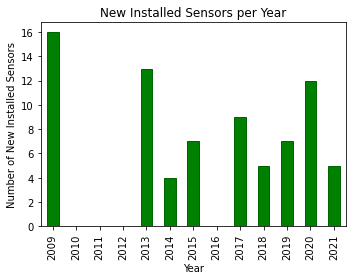

In [15]:
# finding the year of the installation
df_s['Year'] = pd.DatetimeIndex(df_s['installation_date']).year
# adding missing years in range(2009, 2022)
df = pd.DataFrame({'Year': [2010, 2011, 2012, 2016]})
df_s_y = df_s.append(df, ignore_index = True)

# Plot that shows new introduced sensors per year
fig = plt.figure(figsize=(5, 4))
df_s_y.groupby(['Year']).count()['sensor_id'].plot \
    .bar(title='New Installed Sensors per Year', x=range(df_s['Year'].min(),df_s['Year'].max() + 1),
         edgecolor='darkgreen', color = 'green')
# Styling
plt.ylabel('Number of New Installed Sensors');

plt.tight_layout() 
plt.show()